# Importing Python Modules

Python code can be reused from script to script by organising it into what's called a module or package. A module is a collection of code you can use in another script.

Python contains many modules pre-included in what's called its standard library. This standard library is part of what makes python amazing, but there's also a wealth of modules the community have created that shoot Python right to the top. There are four modules we'll use mainly: `numpy`, `scipy`, `sympy`, and `matplotlib`. The former three we'll use to do the heavy lifting in calculations (like integration, optimisation, function solving) and the last one we'll talk most about here: used for plotting.

To import a python module, we use the import statement:

In [5]:
import numpy
print(numpy)

<module 'numpy' from '/usr/local/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'>


`numpy` is a bit of a handful when having to type it out over and over, but luckily we can give it a nickname:

In [6]:
import numpy as np
print(np)

<module 'numpy' from '/usr/local/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'>


## Plotting

`matplotlib` is used to plot data nicely. You don't import it directly (normally). You import a *submodule* of matplotlib called pyplot as so:

In [7]:
from matplotlib import pyplot as plt
# or
import matplotlib.pyplot as plt

To access members of the pyplot module, we just prepend the nickname followed by a period to the function, e.g. to get the `plot` function from `plt` we'd write `plt.plot`.

We can do some simple plotting:

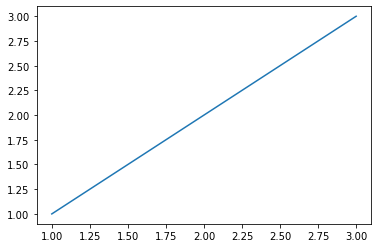

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [18]:
plt.plot([1, 2, 3], [1, 2, 3])
plt.show()

# plt.plot(x, y, style, **options)
# for more info:
help(plt.plot)

Cool! But we can do so much more. `matplotlib` is extremely feature rich and allows you do produce some incredible plots, suitable for any report, paper, or dissertation. As a small example of what you can do in `matplotlib`, let's plot the specific heat of nitrogen from the previous notebook.

### Shomate equation


The molar heat capacity is given by
\begin{align*}
C_p(T)
&= A + B t + C t^2 + D t^3 + E t^{-2}
\end{align*}
where $T$ is absolute temperature in kelvin, $t=T/1000$, $C_p$ is molar heat capacity in ${\rm J\,mol^{-1}\,K^{-1}}$, and $A$, $B$, $C$, $D$, and $E$ are constants


The parameters of the Shomate equation for nitrogen are given below (taken from the [NIST webbook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C7727379&Type=JANAFG&Table=on#JANAFG)):

| Temperature / K | $100.$ - $500.$ | $500.$ - $2000.$ | $2000.$ - $6000.$ |
|:--- | ---:| ---:| ---:|
| $A$             |   $ 28.98641$ |    $ 19.50583$ |     $ 35.51872$ |
| $B$             |   $ 1.853978$ |    $ 19.88705$ |     $ 1.128728$ |
| $C$             |   $-9.647459$ |    $-8.598535$ |     $-0.196103$ |
| $D$             |   $ 16.63537$ |    $ 1.369784$ |     $ 0.014662$ |
| $E$             |   $ 0.000117$ |    $ 0.527601$ |     $-4.553760$ |

In [11]:
def get_Cp(T):

    # Get shomate coefficients from the NIST data, depending on temperature
    
    # Could use a range check here
    if T >= 100.0 and T <= 500.0:
        A =  28.98641
        B =  1.853978
        C = -9.647459
        D =  16.63537
        E =  0.000117
    elif 500.0 < T <= 2000.0:
        A =  19.50583
        B =  19.88705
        C = -8.598535
        D =  1.369784
        E =  0.527601
    elif 2000.0 < T <= 6000.0:
        A =  35.51872
        B =  1.128728
        C = -0.196103
        D =  0.014662
        E = -4.553760
    else:
        raise Exception('error: Temperature out of range')

    t = T / 1000.0
    Cp = A + B*t + C*t**2 + D*t**3 + E / t**2

    return Cp

To plot this function, we'll need some $x$ data, and some $y$ data. The $x$ data will be the temperature, and $y$ are the $C_p$ values for the temperatures.

To generate a list of temperatures, we can use the `range` function. This function takes in up to three arguments: the first is the starting value, the second is the exclusive end (i.e. the range will stop one step before this value), and the final value is the step.

In [9]:
T = list(range(100, 6000, 100))
print(T)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900]


Now for $y$ ($C_p$) we can use a lsit comprehension:

In [13]:
Cp = [get_Cp(Ti) for Ti in T]

And finally to plotting. We can pass extra options to the plot function to tell it how to format the line. The first argument following the $x$ and $y$ values is a string defining the line and marker style (and optionally the colour too).

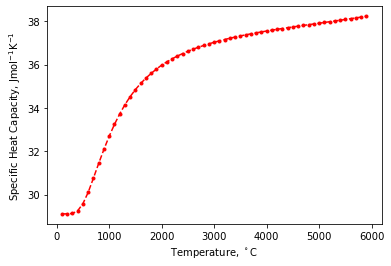

In [22]:
plt.plot(T, Cp, '.--', color='red')

# -- means dashed line
# . means small circle markers
# default is solid line no marker

plt.xlabel('Temperature, $\\rm ^\\circ{}C$')
plt.ylabel('Specific Heat Capacity, $\\rm J mol^{-1} K^{-1}$')

plt.show()

### Conclusion

In this notebook we've introduced the concept of importing a package into a Python script, as well as briefly discussed using `matplotlib` to plot data. In the [next notebook](python_numpy.ipynb), we'll look at `numpy`, from which we'll get mathematical functions like `sin` and `cos`.